In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import pylab
import scipy
import io
import math

In [ ]:
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded["worldometer_data.csv"]))

Saving worldometer_data.csv to worldometer_data.csv


In [ ]:
df

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,NaN,1.0,NaN,10.0,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3.489000e+03,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,8.010000e+02,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe


In [ ]:
df.drop('NewCases', axis = 1, inplace = True)
df.drop('NewDeaths', axis = 1, inplace = True) ##Brisanje stupaca koji ne daju relevantne informacije
df.drop('NewRecovered', axis = 1, inplace = True)
df

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,162804.0,2576668.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,98644.0,2047660.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,41638.0,1377384.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,14606.0,676357.0,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,9604.0,387316.0,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,1.0,10.0,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,7.0,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3.489000e+03,13,NaN,13.0,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,8.010000e+02,12,NaN,12.0,0.0,NaN,14981.0,NaN,NaN,NaN,Europe


In [ ]:
df.filter(like = "1", axis=1)

,Tot Cases/1M pop,Deaths/1M pop,Tests/1M pop
0,15194.0,492.0,190640.0
1,13716.0,464.0,62085.0
2,1466.0,30.0,16035.0
3,5974.0,100.0,203623.0
4,9063.0,162.0,53044.0
...,...,...,...
153,1933.0,36.0,12230.0
160,684.0,28.0,6563.0
185,3183.0,102.0,972982.0
187,939.0,31.0,15305.0


In [ ]:
df.filter(like = "1", axis=0)

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
1,Brazil,South America,212710692.0,2917562,98644.0,2047660.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
10,Iran,Asia,84097623.0,320117,17976.0,277463.0,24678.0,4156.0,3806.0,214.0,2612763.0,31068.0,EasternMediterranean
12,Saudi Arabia,Asia,34865919.0,284226,3055.0,247089.0,34082.0,1915.0,8152.0,88.0,3635705.0,104277.0,EasternMediterranean
13,Pakistan,Asia,221295851.0,281863,6035.0,256058.0,19770.0,809.0,1274.0,27.0,2058872.0,9304.0,EasternMediterranean
15,Italy,Europe,60452568.0,249204,35187.0,201323.0,12694.0,42.0,4122.0,582.0,7099713.0,117443.0,Europe
16,Turkey,Asia,84428331.0,237265,5798.0,220546.0,10921.0,580.0,2810.0,69.0,5081802.0,60191.0,Europe
17,Argentina,South America,45236884.0,228195,4251.0,99852.0,124092.0,1150.0,5044.0,94.0,794544.0,17564.0,Americas
18,Germany,Europe,83811260.0,215210,9252.0,196200.0,9758.0,236.0,2568.0,110.0,8586648.0,102452.0,Europe
19,France,Europe,65288306.0,195633,30312.0,82460.0,82861.0,384.0,2996.0,464.0,3992206.0,61147.0,Europe
21,Philippines,Asia,109722719.0,119460,2150.0,66837.0,50473.0,239.0,1089.0,20.0,1669996.0,15220.0,WesternPacific


In [ ]:
df.filter(items = ["Country/Region", "TotalCases", "TotalDeaths", "TotalRecovered"])

,Country/Region,TotalCases,TotalDeaths,TotalRecovered
0,USA,5032179,162804.0,2576668.0
1,Brazil,2917562,98644.0,2047660.0
2,India,2025409,41638.0,1377384.0
3,Russia,871894,14606.0,676357.0
4,South Africa,538184,9604.0,387316.0
...,...,...,...,...
153,Bahamas,761,14.0,91.0
160,Guyana,538,22.0,189.0
185,Monaco,125,4.0,105.0
187,Antigua and Barbuda,92,3.0,76.0


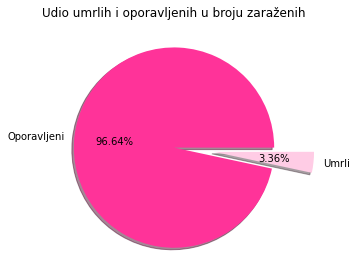

In [ ]:
## Kolika je smrtnost među oboljelima?

zarazeni = df.sum(axis=0)[3]
umrli = df.sum(axis=0)[4]
pt = [zarazeni, umrli]
explode = (0, 0.4) 
labels = ["Oporavljeni", "Umrli"]
colors = ["#FF3399", "#FFCCE5"]
plt.title("Udio umrlih i oporavljenih u broju zaraženih")
plt.pie(pt, labels = labels, shadow=True, autopct='%1.2f%%', colors=colors, explode=explode)
plt.tight_layout()
plt.show()

In [ ]:
## Koja država ima najveći postotak zaraženog stanovništva?
ukupno_zarazenih = {"Naziv_drzave": [], "Postotak": []} ##dictionary
for i in range(0, len(df)):
  if(not math.isnan(df["Population"][i])):
      ukupno_zarazenih["Naziv_drzave"].append(df["Country/Region"][i])
      ukupno_zarazenih["Postotak"].append(np.divide(df["TotalCases"][i],df["Population"][i]))

max = 0
drzava_max = ""
for j in range(0, len(ukupno_zarazenih["Postotak"])):
  if(ukupno_zarazenih["Postotak"][j] > max):
    max = ukupno_zarazenih["Postotak"][j]
    drzava_max = ukupno_zarazenih["Naziv_drzave"][j]
print(drzava_max, round(max * 100,2), '%')

Qatar 3.99 %


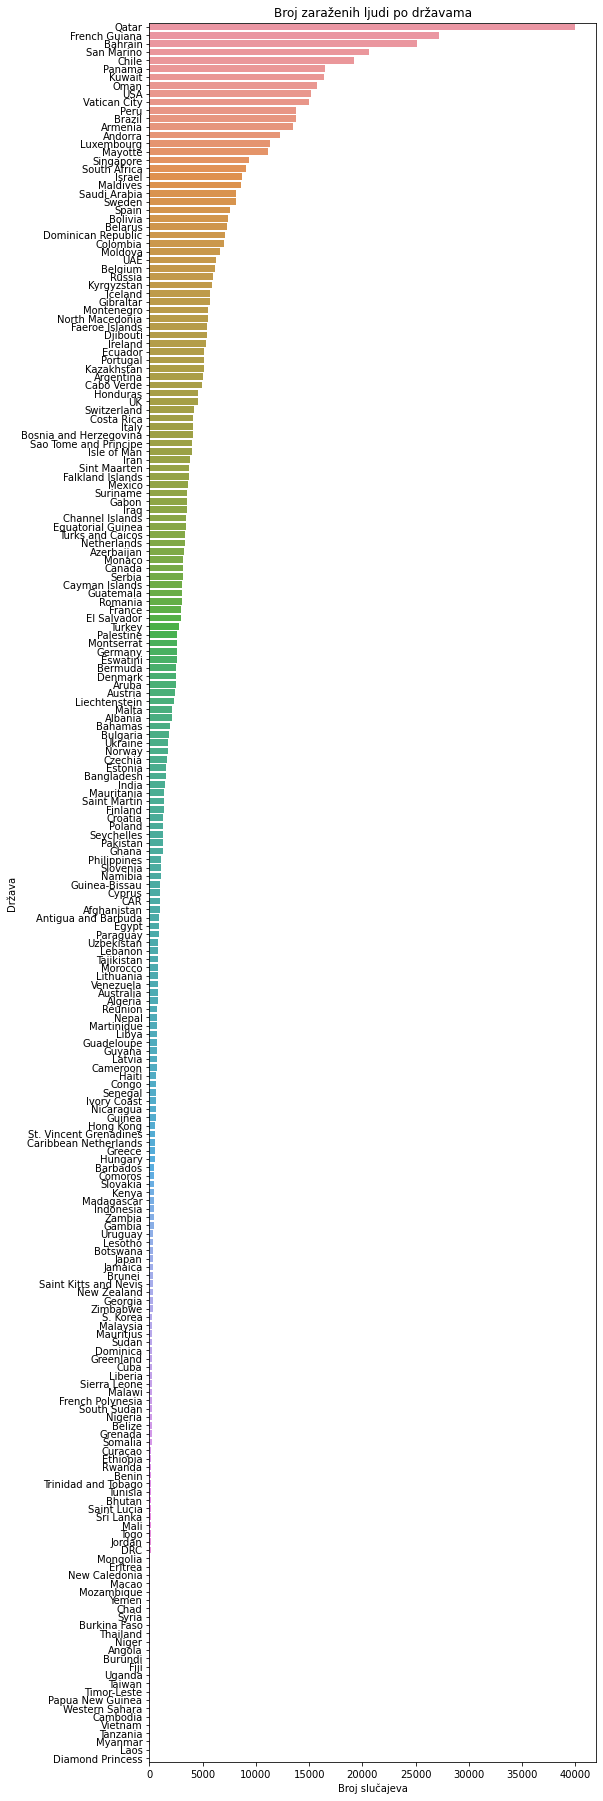

In [ ]:
hp = df.sort_values(by = "Tot Cases/1M pop", ascending=False)
plt.figure(figsize=(8,32))
sns.barplot(x=hp["Tot Cases/1M pop"], y=hp['Country/Region'])
plt.xlabel("Broj slučajeva")
plt.ylabel("Država")
plt.title("Broj zaraženih ljudi po državama")
plt.show()

In [ ]:
## U kojoj državi je umrlo najviše ljudi?

najvise_umrlih = {"Naziv_drzave": [], "Umrlih": []} ##dictionary
for i in range(0, len(df)):
  if(not math.isnan(df["TotalDeaths"][i])):
      najvise_umrlih["Naziv_drzave"].append(df["Country/Region"][i])
      najvise_umrlih["Umrlih"].append((float(df["TotalDeaths"][i])))
max_umrlih = 0
drzava_umrli = ""
for j in range(0, len(najvise_umrlih["Umrlih"])):
  if(najvise_umrlih["Umrlih"][j] > max_umrlih):
    max_umrlih = najvise_umrlih["Umrlih"][j]
    drzava_umrli = najvise_umrlih["Naziv_drzave"][j]
print(drzava_umrli,max_umrlih)

USA 162804.0


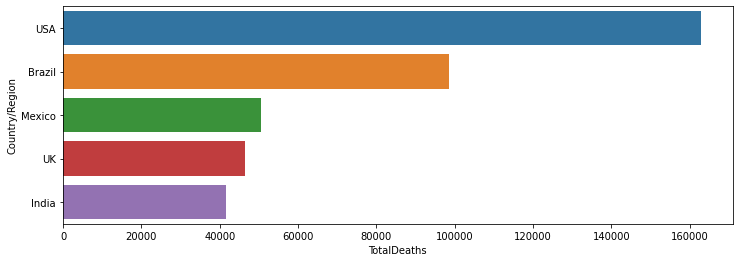

In [ ]:
sortirano_po_broju_umrlih = df.sort_values(by = "TotalDeaths", ascending=False)
sortirano_po_broju_umrlih_head = sortirano_po_broju_umrlih.head()
plt.figure(figsize=(12,4))
sns.barplot(x=sortirano_po_broju_umrlih_head["TotalDeaths"], y=sortirano_po_broju_umrlih_head["Country/Region"])

In [ ]:
##•	Koliki udio svjetske populacije je umro od ove bolesti?

svjetska_populacija = 0
for i in range(len(df["Population"])):
  if(not math.isnan(df["Population"][i])):
    svjetska_populacija += df["Population"][i]
svjetska_populacija

umrlih_u_svijetu = 0
for j in range(len(df["TotalDeaths"])):
  if(not math.isnan(df["TotalDeaths"][j])):
    umrlih_u_svijetu += df["TotalDeaths"][j]
umrlih_u_svijetu

postotak_smrtnosti = np.divide(umrlih_u_svijetu, svjetska_populacija)
print(round(postotak_smrtnosti * 100,5), "%")

broj_umrlih = np.multiply(svjetska_populacija, postotak_smrtnosti)
print(broj_umrlih)

0.01127 %
713007.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


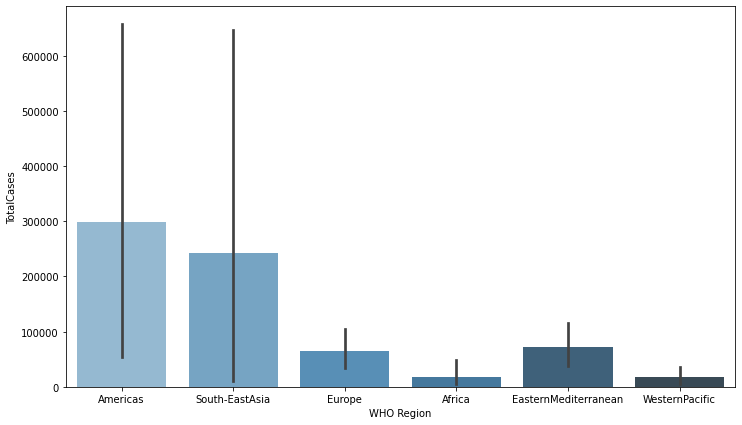

In [ ]:
##•	Koja WHO regija ima najgore rezultate?

who_regije = df.groupby("WHO Region").nunique()
who_regije
plt.figure(figsize=(12,7))
sns.barplot(df["WHO Region"], df["TotalCases"], data=df, palette="Blues_d")

In [ ]:
## Koji je prosjek broja slučajeva po državi, minimum, maksimum?

slucajevi = np.array(df["TotalCases"])
prosjek = slucajevi.mean()
minimum = slucajevi.min()
maksimum = slucajevi.max()
std = slucajevi.std()
varijanca = slucajevi.var()

agg_series = pd.Series([prosjek, minimum, maksimum, std, varijanca], 
                       index=["Prosjek", "Minimum", "Maksimum", "Standardna devijacija", "Varijanca"])
agg_series

Prosjek                  9.171850e+04
Minimum                  1.000000e+01
Maksimum                 5.032179e+06
Standardna devijacija    4.315505e+05
Varijanca                1.862359e+11
dtype: float64

Korelacija varijabli Serious, critical i TotalCases iznosi  0.96852884506455


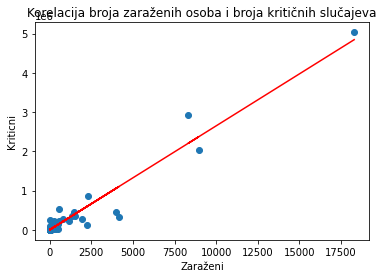

In [ ]:
df.dropna(how='any', inplace=True)
kriticni = df["Serious,Critical"]
tot_cases = df["TotalCases"]
korelacija = scipy.stats.pearsonr(tot_cases, kriticni)

plt.title('Korelacija broja zaraženih osoba i broja kritičnih slučajeva')
plt.xlabel('Zaraženi')
plt.ylabel('Kriticni')

m, b = np.polyfit(kriticni, tot_cases, 1)

plt.plot(kriticni, m*kriticni+b, color="red")
plt.scatter(kriticni, tot_cases)
print("Korelacija varijabli Serious, critical i TotalCases iznosi ",korelacija[0])
plt.show()

In [ ]:
scipy.stats.describe(tot_cases)

DescribeResult(nobs=103, minmax=(86, 5032179), mean=170184.17475728155, variance=366423626178.5965, skewness=6.3178555289582325, kurtosis=43.30106284330581)

In [ ]:
scipy.stats.skew(tot_cases)

6.3178555289582325

In [ ]:
scipy.stats.kurtosis(tot_cases)

43.30106284330581

In [ ]:
korelacija = scipy.stats.pearsonr(tot_cases, kriticni)
korelacija

(0.96852884506455, 8.148248085523808e-63)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


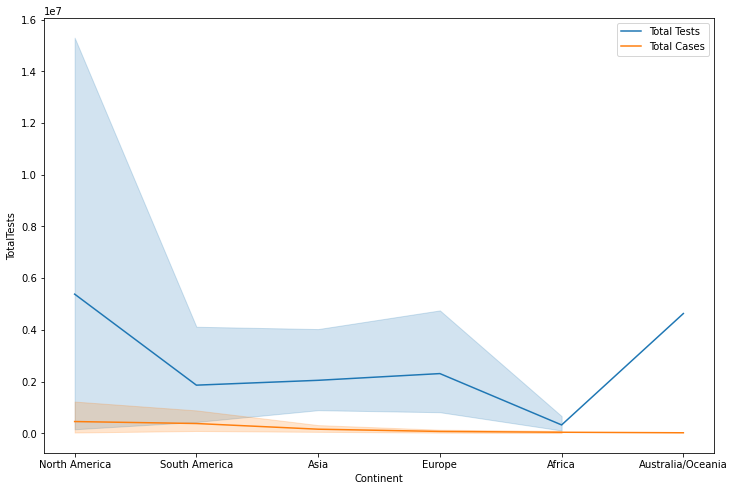

In [ ]:
##	Znači li veći broj testova i veći broj slučajeva?

plt.figure(figsize=(12, 8))
sns.lineplot(df["Continent"], df["TotalTests"])
sns.lineplot(df["Continent"], df["TotalCases"])
plt.legend(["Total Tests", "Total Cases"])
plt.show()

In [ ]:
##	Koja europska država bilježi najveći broj slučajeva?
filter_europa = df['WHO Region']=="Europe"
filter_europa

0      False
1      False
2      False
3       True
4      False
       ...  
153    False
160    False
185     True
187    False
189    False
Name: WHO Region, Length: 103, dtype: bool

In [ ]:
novi_df = df[filter_europa]
novi_df

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
3,Russia,Europe,145940924.0,871894,14606.0,676357.0,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
15,Italy,Europe,60452568.0,249204,35187.0,201323.0,12694.0,42.0,4122.0,582.0,7099713.0,117443.0,Europe
16,Turkey,Asia,84428331.0,237265,5798.0,220546.0,10921.0,580.0,2810.0,69.0,5081802.0,60191.0,Europe
18,Germany,Europe,83811260.0,215210,9252.0,196200.0,9758.0,236.0,2568.0,110.0,8586648.0,102452.0,Europe
19,France,Europe,65288306.0,195633,30312.0,82460.0,82861.0,384.0,2996.0,464.0,3992206.0,61147.0,Europe
25,Kazakhstan,Asia,18798667.0,95942,1058.0,68871.0,26013.0,221.0,5104.0,56.0,2163713.0,115099.0,Europe
31,Israel,Asia,9197590.0,79559,576.0,53427.0,25556.0,358.0,8650.0,63.0,1872453.0,203581.0,Europe
32,Ukraine,Europe,43705858.0,76808,1819.0,42524.0,32465.0,158.0,1757.0,42.0,1116641.0,25549.0,Europe
35,Belgium,Europe,11594739.0,71158,9859.0,17661.0,43638.0,61.0,6137.0,850.0,1767120.0,152407.0,Europe
39,Romania,Europe,19224023.0,57895,2566.0,28992.0,26337.0,458.0,3012.0,133.0,1319369.0,68631.0,Europe


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


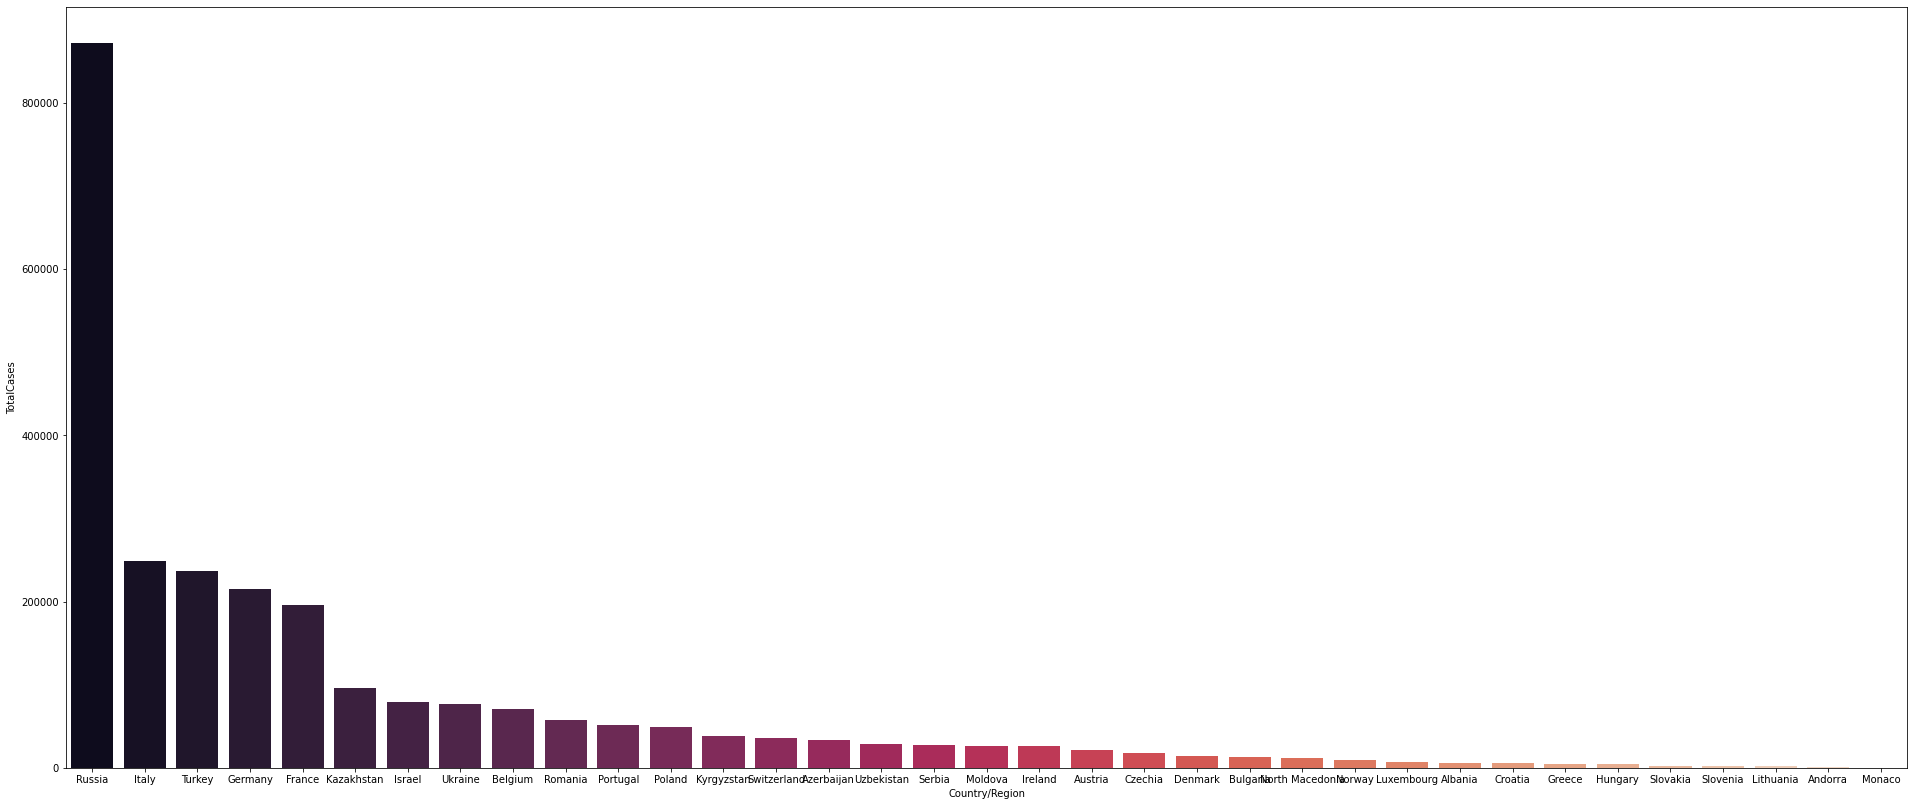

In [ ]:
plt.figure(figsize=(33,14))
sns.barplot(novi_df["Country/Region"], novi_df["TotalCases"], data=novi_df, palette="rocket")